In [1]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
import pandas as pd
import statistics

import warnings
warnings.filterwarnings('ignore')

In [2]:
def layer(input_neurons, hidden_neurons):
    return np.random.uniform(-1, 1, (input_neurons, hidden_neurons))       

In [3]:
def dot_prod(inputs, weights):
    return np.dot(weights.T, inputs)

In [4]:
def Sigmoid(inputs):
    return (1 / (1 + np.exp(-inputs)))

In [5]:
def randomize_dataset(inputs, targets):
    dataset = np.concatenate((inputs.T, targets.T), axis=1)
    np.random.shuffle(dataset)
    return [np.array(dataset[:,0:5].T), np.array(dataset[:,5].T).reshape(1,16)]

In [6]:
def forwardProp(x, W_layers):
    
    layer_1 = dot_prod(x, W_layers[0])
    activation_unit_1 = Sigmoid(layer_1)

    layer_2 = dot_prod(np.insert(activation_unit_1,0,1,axis=0), W_layers[1])
    activation_unit_2 = Sigmoid(layer_2)
    
    return [activation_unit_1] + [activation_unit_2]

In [7]:
def backProp(x, Y, d_k, W, eta, delta_w, alpha):
    
    output_layer_values = Y[1]
    hidden_layer_values = Y[0]
    
    # Back propogration - weight update rule
    delta_k = output_layer_values * (1 - output_layer_values) * (d_k - output_layer_values)
    delta_w[1] = eta * delta_k.T * np.insert(Y[0], 0, 1, axis=0) + (alpha * delta_w[1])

    # Chain Rule
    delta_j = hidden_layer_values * (1 - hidden_layer_values) * W[1][1:, :] * delta_k
    delta_w[0] = eta * delta_j.T * x + (alpha * delta_w[0])

    # Update the weights of the layers
    W[0] += delta_w[0]
    W[1] += delta_w[1]

In [8]:
def mlp(X, y, W, eta, alpha):
    epoch = 0
    delta_w = [np.zeros(W[0].shape)] + [np.zeros(W[1].shape)]
    errors = []
    while True:
        above_tresh = False
        # Shuffling the data before each iteration
        randomize = randomize_dataset(X, y)
        X_epoch, y_epoch = randomize
        
        # Stochastically go through the dataset
        err_list = []
        for i in range(0,16):
            error_epoch = 0

            x = X_epoch[:,i].reshape(5,1)
            Y = forwardProp(x,W)
            
            backProp(x, Y, np.reshape(y_epoch[:, i], (1, 1)), W, eta, delta_w, alpha)
            
            actual = y_epoch[:,i].tolist()[0]
            predicted = Y[1].tolist()[0][0]

            
            error_epoch = abs(actual-predicted)
            err_list.append(abs(actual-predicted))
            # Check if error is within threshold in each iteration
            if error_epoch<=0.05:
                pass
            else:
                above_tresh = True
                             
        errors.append(np.mean(err_list))
                
        epoch += 1
        if not above_tresh:
            break

    return [epoch,errors]

In [9]:
#Input for Parity dataset along with bias term
X = np.array([[0,0,0,0,1], 
    [0,0,0,1,1], 
    [0,0,1,0,1], 
    [0,0,1,1,1], 
    [0,1,0,0,1], 
    [0,1,0,1,1], 
    [0,1,1,0,1], 
    [0,1,1,1,1], 
    [1,0,0,0,1], 
    [1,0,0,1,1],
    [1,0,1,0,1],
    [1,0,1,1,1],
    [1,1,0,0,1],
    [1,1,0,1,1],
    [1,1,1,0,1],
    [1,1,1,1,1]],  dtype=np.float32).T

#Target column
y = np.array([[0], [1], [1], [0], [1], [0], [0], [1], [1], [0], [0], [1], [0], [1], [1], [0]],  dtype=np.float32).T

# Initialize multi-layer perceptron
layer_1 = layer(5, 4)
layer_2 = layer(5, 1)

W = [layer_1] + [layer_2]

#### Finding convergence with different values of learning rate without Momentum term

Number of epochs vs Error when Learning Rate = 0.05, Momentum = 0

In [10]:
lr = 0.05;
epoch_1, error_1 = mlp(X, y, deepcopy(W), lr, 0)

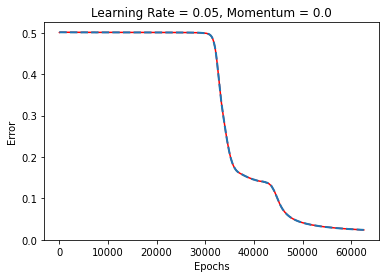

In [11]:
plt.title('Learning Rate = 0.05, Momentum = 0.0')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(range(1, epoch_1 +1,100), error_1[::100], color ='r');
plt.plot(range(1, epoch_1 +1,100), error_1[::100], linestyle='dashed', linewidth=2, markersize=12)

Number of epochs vs Error when Learning Rate = 0.1, Momentum = 0

In [ ]:
lr = 0.1;
epoch_2, error_2 = mlp(X, y, deepcopy(W), lr, 0)

In [ ]:
plt.title('Learning Rate = 0.1, Momentum = 0.0')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(range(1, epoch_2 +1,100), error_2[::100], color ='r');
plt.plot(range(1, epoch_2 +1,100), error_2[::100], linestyle='dashed', linewidth=2, markersize=12)

Number of epochs vs Error when Learning Rate = 0.15, Momentum = 0

In [ ]:
lr = 0.15;
epoch_3, error_3 = mlp(X, y, deepcopy(W), lr, 0)

In [ ]:
plt.title('Learning Rate = 0.15, Momentum = 0.0')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(range(1, epoch_3 +1,100), error_3[::100], color ='r');
plt.plot(range(1, epoch_3 +1,100), error_3[::100], linestyle='dashed', linewidth=2, markersize=12)

Number of epochs vs Error when Learning Rate = 0.2, Momentum = 0

In [ ]:
lr = 0.2;
epoch_4, error_4 = mlp(X, y, deepcopy(W), lr, 0)

In [ ]:
plt.title('Learning Rate = 0.2, Momentum = 0.0')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(range(1, epoch_4 +1,100), error_4[::100], color ='r');
plt.plot(range(1, epoch_4 +1,100), error_4[::100], linestyle='dashed', linewidth=2, markersize=12)

Number of epochs vs Error when Learning Rate = 0.25, Momentum = 0

In [ ]:
lr = 0.25;
epoch_5, error_5 = mlp(X, y, deepcopy(W), lr, 0)

In [ ]:
plt.title('Learning Rate = 0.25, Momentum = 0.0')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(range(1, epoch_5 +1,100), error_5[::100], color ='r');
plt.plot(range(1, epoch_5 +1,100), error_5[::100], linestyle='dashed', linewidth=2, markersize=12)

Number of epochs vs Error when Learning Rate = 0.3, Momentum = 0

In [ ]:
lr = 0.3;
epoch_6, error_6 = mlp(X, y, deepcopy(W), lr, 0)

In [ ]:
plt.title('Learning Rate = 0.3, Momentum = 0.0')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(range(1, epoch_6 +1,100), error_6[::100], color ='r');
plt.plot(range(1, epoch_6 +1,100), error_6[::100], linestyle='dashed', linewidth=2, markersize=12)

Number of epochs vs Error when Learning Rate = 0.35, Momentum = 0

In [ ]:
lr = 0.35;
epoch_7, error_7 = mlp(X, y, deepcopy(W), lr, 0)

In [ ]:
plt.title('Learning Rate = 0.35, Momentum = 0.0')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(range(1, epoch_7 +1,100), error_7[::100], color ='r');
plt.plot(range(1, epoch_7 +1,100), error_7[::100], linestyle='dashed', linewidth=2, markersize=12)

Number of epochs vs Error when Learning Rate = 0.4, Momentum = 0

In [ ]:
lr = 0.4;
epoch_8, error_8 = mlp(X, y, deepcopy(W), lr, 0)

In [ ]:
plt.title('Learning Rate = 0.4, Momentum = 0.0')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(range(1, epoch_8 +1,100), error_8[::100], color ='r');
plt.plot(range(1, epoch_8 +1,100), error_8[::100], linestyle='dashed', linewidth=2, markersize=12)

Number of epochs vs Error when Learning Rate = 0.45, Momentum = 0

In [ ]:
lr = 0.45;
epoch_9, error_9 = mlp(X, y, deepcopy(W), lr, 0)

In [ ]:
plt.title('Learning Rate = 0.45, Momentum = 0.0')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(range(1, epoch_9 +1,100), error_9[::100], color ='r');
plt.plot(range(1, epoch_9 +1,100), error_9[::100], linestyle='dashed', linewidth=2, markersize=12)

Number of epochs vs Error when Learning Rate = 0.5, Momentum = 0

In [ ]:
lr = 0.5;
epoch_10, error_10 = mlp(X, y, deepcopy(W), lr, 0)

In [ ]:
plt.title('Learning Rate = 0.5, Momentum = 0.0')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(range(1, epoch_10 +1,100), error_10[::100], color ='r');
plt.plot(range(1, epoch_10 +1,100), error_10[::100], linestyle='dashed', linewidth=2, markersize=12)

#### Analysis

In [ ]:
epoch_list = [epoch_1,epoch_2,epoch_3,epoch_4,epoch_5,epoch_6,epoch_7,epoch_8,epoch_9,epoch_10]
lr = [0.05*i for i in range(1,11)]

In [ ]:
epoch_df = pd.DataFrame(epoch_list, lr)
epoch_df.columns = ['Epochs']
epoch_df

#### Vary the value of η from 0.05 to 0.5 using an increment of 0.05, and report the number of epochs needed for each choice of η. Also generate learning curve plots for each case. Discusshow the value of η influences convergence.

As the learning rate increases, we see that the network is converging faster or in lesser epochs. Initially when the learning rate = 0.05 the network takes the most number of epochs to converge. Most of the times the network gets stuck at a local minima and takes some iterations to get away from it. As learning rate increases we see that the network is breaking from this local minima in a faster way.

### Finding convergence with different values of learning rate with Momentum term

Number of epochs vs Error when Learning Rate = 0.05, Momentum = 0

In [ ]:
lr = 0.05;
epoch_11, error_11 = mlp(X, y, deepcopy(W), lr, 0.9)

In [ ]:
plt.title('Learning Rate = 0.05, Momentum = 0.9')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(range(1, epoch_11 +1,100), error_11[::100], color ='g');
plot(range(1, epoch_11 +1,100), error_11[::100], linestyle='dashed', linewidth=2, markersize=12)

Number of epochs vs Error when Learning Rate = 0.1, Momentum = 0.9

In [ ]:
lr = 0.1;
epoch_12, error_12 = mlp(X, y, deepcopy(W), lr, 0.9)

In [ ]:
plt.title('Learning Rate = 0.1, Momentum = 0.9')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(range(1, epoch_12 +1,100), error_12[::100], color ='g');
plot(range(1, epoch_12 +1,100), error_12[::100], linestyle='dashed', linewidth=2, markersize=12)

Number of epochs vs Error when Learning Rate = 0.15, Momentum = 0.9

In [ ]:
lr = 0.15;
epoch_13, error_13 = mlp(X, y, deepcopy(W), lr, 0.9)

In [ ]:
plt.title('Learning Rate = 0.15, Momentum = 0.9')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(range(1, epoch_13 +1,100), error_13[::100], color ='g');
plot(range(1, epoch_13 +1,100), error_13[::100], linestyle='dashed', linewidth=2, markersize=12)

Number of epochs vs Error when Learning Rate = 0.2, Momentum = 0.9

In [ ]:
lr = 0.2;
epoch_14, error_14 = mlp(X, y, deepcopy(W), lr, 0.9)

In [ ]:
plt.title('Learning Rate = 0.2, Momentum = 0.9')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(range(1, epoch_14 +1,100), error_14[::100], color ='g');
plot(range(1, epoch_14 +1,100), error_14[::100], linestyle='dashed', linewidth=2, markersize=12)

Number of epochs vs Error when Learning Rate = 0.25, Momentum = 0.9

In [ ]:
lr = 0.25;
epoch_15, error_15 = mlp(X, y, deepcopy(W), lr, 0.9)

In [ ]:
plt.title('Learning Rate = 0.25, Momentum = 0.9')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(range(1, epoch_15 +1,100), error_15[::100], color ='g');
plot(range(1, epoch_15 +1,100), error_15[::100], linestyle='dashed', linewidth=2, markersize=12)

Number of epochs vs Error when Learning Rate = 0.3, Momentum = 0.9

In [ ]:
lr = 0.3;
epoch_16, error_16 = mlp(X, y, deepcopy(W), lr, 0.9)

In [ ]:
plt.title('Learning Rate = 0.3, Momentum = 0.9')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(range(1, epoch_16 +1,100), error_16[::100], color ='g');
plot(range(1, epoch_16 +1,100), error_16[::100], linestyle='dashed', linewidth=2, markersize=12)

Number of epochs vs Error when Learning Rate = 0.35, Momentum = 0.9

In [ ]:
lr = 0.35;
epoch_17, error_17 = mlp(X, y, deepcopy(W), lr, 0.9)

In [ ]:
plt.title('Learning Rate = 0.35, Momentum = 0.9')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(range(1, epoch_17 +1,100), error_17[::100], color ='g');
plot(range(1, epoch_17 +1,100), error_17[::100], linestyle='dashed', linewidth=2, markersize=12)

Number of epochs vs Error when Learning Rate = 0.4, Momentum = 0.9

In [ ]:
lr = 0.4;
epoch_18, error_18 = mlp(X, y, deepcopy(W), lr, 0.9)

In [ ]:
plt.title('Learning Rate = 0.4, Momentum = 0.9')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(range(1, epoch_18 +1,100), error_18[::100], color ='g');
plot(range(1, epoch_18 +1,100), error_18[::100], linestyle='dashed', linewidth=2, markersize=12)

Number of epochs vs Error when Learning Rate = 0.45, Momentum = 0.9

In [ ]:
lr = 0.45;
epoch_19, error_19 = mlp(X, y, deepcopy(W), lr, 0.9)

In [ ]:
plt.title('Learning Rate = 0.45, Momentum = 0.9')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(range(1, epoch_19 +1,100), error_19[::100], color ='g');
plot(range(1, epoch_19 +1,100), error_19[::100], linestyle='dashed', linewidth=2, markersize=12)

Number of epochs vs Error when Learning Rate = 0.5, Momentum = 0.9

In [ ]:
lr = 0.5;
epoch_20, error_20 = mlp(X, y, deepcopy(W), lr, 0.9)

In [ ]:
plt.title('Learning Rate = 0.5, Momentum = 0.9')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(range(1, epoch_20 +1,100), error_20[::100], color ='g');
plot(range(1, epoch_20 +1,100), error_20[::100], linestyle='dashed', linewidth=2, markersize=12)

#### Analysis

In [ ]:
epoch_list = [epoch_11,epoch_12,epoch_13,epoch_14,epoch_15,epoch_16,epoch_17,epoch_18,epoch_19,epoch_20]
lr = [0.05*i for i in range(1,11)]

In [ ]:
epoch_df = pd.DataFrame(epoch_list, lr)
epoch_df.columns = ['Epochs']
epoch_df

#### Include a momentum term in the weight update with α = 0.9 and report its effect on the speed of training for each value of η.

As we can see the momentum term is helping in faster convergence in the network when compared to the network before. The network converges faster and also shows a similar trend with respect to the learning rate. As the learning rate increases, the number of epochs is showing a slight downtrend. The highest value of epochs is observed at learning rate = 0.05

#### Let us experiment with 16 neurons

In [ ]:
# Initialize multi-layer perceptron
layer_1 = layer(5, 16)
layer_2 = layer(17, 1)

W = [layer_1] + [layer_2]

In [ ]:
lr = 0.25;
epoch_exp_16_.25, error_exp_16_.25 = mlp(X, y, deepcopy(W), lr, 0)

In [ ]:
plt.title('Neurons = 16, Learning Rate = 0.25')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(range(1, epoch_exp_16_.25 +1,100), error_exp_16_.25[::100], color ='red');

In [ ]:
lr = 0.35;
epoch_exp_16_.35, error_exp_16_.35 = mlp(X, y, deepcopy(W), lr, 0)

In [ ]:
plt.title('Neurons = 16, Learning Rate = 0.35')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(range(1, epoch_exp_16_.35 +1,100), error_exp_16_.35[::100], color ='red');

In [ ]:
lr = 0.45;
epoch_exp_16_.45, error_exp_16_.45 = mlp(X, y, deepcopy(W), lr, 0)

In [ ]:
plt.title('Neurons = 16, Learning Rate = 0.45')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(range(1, epoch_exp_16_.45 +1,100), error_exp_16_.45[::100], color ='red');

#### Let us experiment with 32 neurons

In [ ]:
# Initialize multi-layer perceptron
layer_1 = layer(5, 32)
layer_2 = layer(33, 1)

W = [layer_1] + [layer_2]

In [ ]:
lr = 0.25;
epoch_exp_32_.25, error_exp_32_.25 = mlp(X, y, deepcopy(W), lr, 0)

In [ ]:
plt.title('Neurons = 32, Learning Rate = 0.25')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(range(1, epoch_exp_32_05+1,100), error_exp_32_05[::100], color ='green');

In [ ]:
lr = 0.35;
epoch_exp_32_.35, error_exp_32_.35 = mlp(X, y, deepcopy(W), lr, 0)

In [ ]:
plt.title('Neurons = 32, Learning Rate = 0.35')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(range(1, epoch_exp_32_.35+1,100), error_exp_32_.35[::100], color ='green')

In [ ]:
lr = 0.45;
epoch_exp_32_.45, error_exp_32_.45 = runner(X, y, deepcopy(W), lr, 0)

In [ ]:
plt.title('Neurons = 32, Learning Rate = 0.45')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(range(1, epoch_exp_32_.45 +1,100), error_exp_32_.45[::100], color ='green');

#### Vary the value of η from 0.05 to 0.5 using an increment of 0.05, and report the number of epochs needed for each choice of η. Also generate learning curve plots for each case. Discusshow the value of η influences convergence.

As the learning rate increases, we see that the network is converging faster or in lesser epochs. Initially when the learning rate = 0.05 the network takes the most number of epochs to converge. Most of the times the network gets stuck at a local minima and takes some iterations to get away from it. As learning rate increases we see that the network is breaking from this local minima in a faster way.